# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Create two new dataframes

df_north = pd.read_csv('NorthCallCenter.csv')
df_south = pd.read_csv('SouthCallCenter.csv')

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
# Put your EDA code here

#North Call Center Data

#variables to view data
df_north.columns
df_north.head()
df_north.describe()

#variable to show number of reps
calls_takers_north = df_north['Rep ID'].nunique()

#variables to show averages:
average_busy_north = df_north['Busy Minutes'].mean()
average_notready_north = df_north['Not Ready Minutes'].mean()
average_incomingwait_north = df_north['Incoming Wait Time'].mean()
average_duringcallwait_north = df_north['During Call Wait Time'].mean()


#variables to show calls taken in each time block:
time_block_calls_north = df_north['Time Block'].value_counts()


#print statements to show the answers to questions 1-3:

#Question 1:
print('The number of reps in the North Branch are:', calls_takers_north)


#Question 2:

print('\n The average busy time, not ready time, incoming wait and during call time is:\n\n Average Busy', average_busy_north, 
      '\n Not Ready Time', average_notready_north, 
      '\n Incoming Wait Time', average_incomingwait_north,
      '\n During Wait Time', average_duringcallwait_north)



#Question 3:
    
print('\nThe number of calls taken for each time block are:\n', time_block_calls_north)



The number of reps in the North Branch are: 9

 The average busy time, not ready time, incoming wait and during call time is:

 Average Busy 9.987755102040817 
 Not Ready Time 1.9142857142857144 
 Incoming Wait Time 3.048780487804878 
 During Wait Time 2.9673469387755103

The number of calls taken for each time block are:
 12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64


In [3]:
#South Call Center Data

#viewing data
df_south.head()
df_south.describe()

#variable to determine the number of callers
calls_takers_south = df_south['Rep ID'].nunique()

#variables to determine averages
average_busy_south = df_south['Busy Minutes'].mean()
average_notready_south = df_south['Not Ready Minutes'].mean()
average_incomingwait_south = df_south['Incoming Wait Time'].mean()
average_duringcallwait_south = df_south['During Call Wait Time'].mean()


#variable to show calls in each time block
time_block_calls_south = df_south['Time Block'].value_counts()




#Question 1:

print('The number of reps in the South Branch are:', calls_takers_south)


#Question 2:

print('\n The average busy time, not ready time, incoming wait and during call time is:\n\n Average Busy', average_busy_south, 
      '\n Not Ready Time', average_notready_south, 
      '\n Incoming Wait Time', average_incomingwait_south,
      '\n During Wait Time', average_duringcallwait_south)


#Question 3: 

print('\n The number of calls taken for each time block are:\n\n', time_block_calls_south)

The number of reps in the South Branch are: 11

 The average busy time, not ready time, incoming wait and during call time is:

 Average Busy 10.054140127388536 
 Not Ready Time 1.910828025477707 
 Incoming Wait Time 3.0 
 During Wait Time 3.0764331210191083

 The number of calls taken for each time block are:

 12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64


### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

These are the values in the Sale column rectified:
  NO     234
YES     11
Name: Sale, dtype: int64

 There are 2 duplicate rows


KeyError: "['Unnamed: 0'] not found in axis"

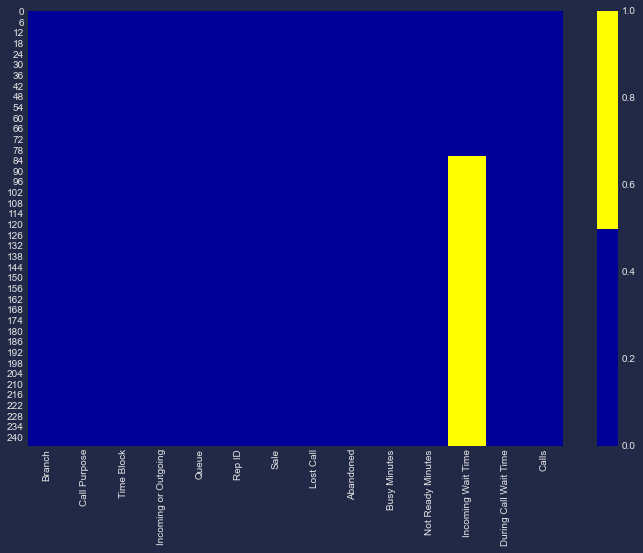

In [18]:
# Clean your data here


#Data Cleaning North Call Center

#Question 1 North Call Center: heatmap showing missing data. Incoming wait time Null values correspond with outgoing calls
cols_north = df_north.columns[:15] # first 15 columns
colors_north = ['#000099', '#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_north[cols_north].isnull(), cmap=sns.color_palette(colors_north))



#Question 2:
#The reason Yes shows twice is because there is a trailing white space in one of the values

df_north['Sale'].value_counts()  #returns the number of unique values of Sale


df_north['Sale'] = df_north['Sale'].str.strip() #Replaces the 'Sales' Column with the same data without trailing or leading white spaces

df_north['Sale'].value_counts() #shows cleaned data for 'Sale'

print('These are the values in the Sale column rectified:\n ', df_north['Sale'].value_counts())


#Question 3:

north_dupes = df_north.duplicated() #checks for duplicate rows
print('\n There are', north_dupes.sum(), 'duplicate rows') # There are no duplicate rows



#Question 4: 

#There is an unnamed column with no explaination of what this data represents. I will drop it

Unnamed = ['Unnamed: 0']
df_north = df_north.drop(Unnamed, axis=1) #drops the Unnamed column
df_north.head() #displays columns without unnamed



 There are 0 duplicate rows


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


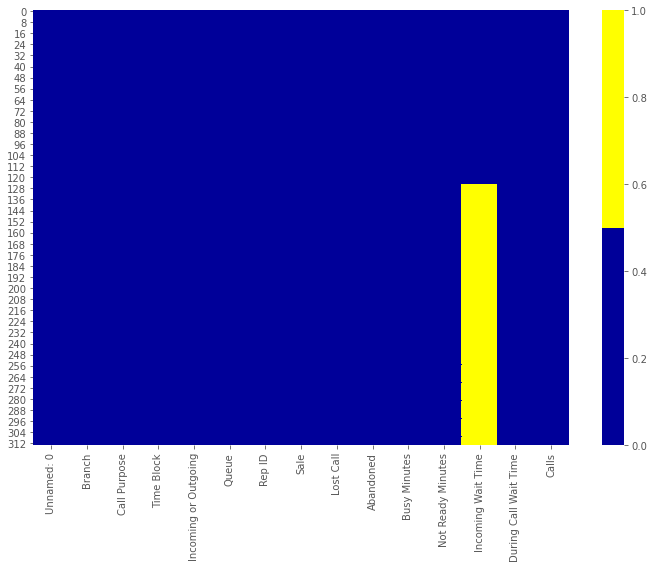

In [5]:
#Data Cleaning South Call Center

#Question 1: South Call Center: heatmap showing missing data. Incoming wait time Null values correspond with outgoing calls
cols_south = df_south.columns[:15] # first 15 columns
colors_south = ['#000099', '#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_south[cols_south].isnull(), cmap=sns.color_palette(colors_south))

#Question 3:
south_dupes = df_south.duplicated() #checks for duplicate rows
print('\n There are', south_dupes.sum(), 'duplicate rows') # There are no duplicate rows


#Question 4:

#There is an unnamed column and no explaination of what this data is for. I will drop it

Unnamed = ['Unnamed: 0']
df_south = df_south.drop(Unnamed, axis=1) #drops Unnamed
df_south.head() #displays columsn without unnamed
 

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [6]:
# Manipulate data here

#concatenate North and South Call center dataframes
df = pd.concat([df_north, df_south]) #concatenates keeping the old index
df.head()


#Question 1:

#variables to establish calls per rep 

Rep_ID_all = df.groupby('Rep ID')
calls_per_rep_south = df_south.groupby('Rep ID') 
calls_per_rep_north = df_north.groupby('Rep ID') 



# variables to display the highest call taker

highest_overall_call_taker = Rep_ID_all.sum()['Calls'].nlargest(1) 
south_highest_call_taker = calls_per_rep_south.sum()['Calls'].nlargest(1)
north_highest_call_taker = calls_per_rep_north.sum()['Calls'].nlargest(1)



#displays the results
print("The highest rep with the highest number of calls in each branch is:\n\n North: ",north_highest_call_taker,
     "\n\n South: ", south_highest_call_taker,
     "\n\n The rep with the highest number of calls company wide is: ", highest_overall_call_taker) 




#Question 2:  South is lower than the KPI range

#variables 
all_abandoned_calls = df['Abandoned'].mean()
north_abandoned_calls = df_north['Abandoned'].mean()
south_abandoned_calls = df_south['Abandoned'].mean()


#print statement to show data
print('\n The Average Abandoned calls per Branch are: \n North: ', north_abandoned_calls,
     '\n South: ', south_abandoned_calls,
     '\n Average call abandonment company wide is : ', all_abandoned_calls )




#Question 3:

#variables 

#create a dataframe with Incoming Wait time

incoming_wait_north = df_north['Incoming Wait Time']
incoming_wait_south = df_south['Incoming Wait Time']
incoming_wait = df['Incoming Wait Time']




#Filter out incoming wait times that are <=2, add add it up and divide by the total incoming wait to determine the average

calls_in_range_north = (incoming_wait_north <= 2.0).sum()/incoming_wait_north.sum()
calls_in_range_south = (incoming_wait_south <=2.0).sum()/incoming_wait_south.sum()
calls_in_range = (incoming_wait <=2.0).sum() / incoming_wait.sum()




#multiply by 100 to show the results as a percent

print('\n\n The percentage of calls in Range at each branch are: \n\n North:  ', calls_in_range_north*100,
     '\n\n South: ', calls_in_range_south*100,
     '\n\n Company wide this is the percentage of calls meeting the 2 secound or less KPI: ', calls_in_range *100) 






#Question 4: 

#variables showing how long a customer waits for a call to be answered
answer_speed = df['Incoming Wait Time'].mean()
north_answer_speed = df_north['Incoming Wait Time'].mean()
south_answer_speed = df_south['Incoming Wait Time'].mean()


#display the Average Speed of Answer
print('\n\n The Average speed of answer per Branch is: \n\n North: ', north_answer_speed,
     '\n South: ', south_answer_speed,
     '\n The speed of answer company wide is: ', answer_speed)

The highest rep with the highest number of calls in each branch is:

 North:  Rep ID
Brent    37
Name: Calls, dtype: int64 

 South:  Rep ID
Eric    35
Name: Calls, dtype: int64 

 The rep with the highest number of calls company wide is:  Rep ID
Brent    37
Name: Calls, dtype: int64

 The Average Abandoned calls per Branch are: 
 North:  0.02857142857142857 
 South:  0.012738853503184714 
 Average call abandonment company wide is :  0.01967799642218247


 The percentage of calls in Range at each branch are: 

 North:   13.200000000000001 

 South:  12.698412698412698 

 Company wide this is the percentage of calls meeting the 2 secound or less KPI:  12.898089171974522


 The Average speed of answer per Branch is: 

 North:  3.048780487804878 
 South:  3.0 
 The speed of answer company wide is:  3.019230769230769


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

Text(0.5, 0, 'Percent of Calls Abandoned per Queue')

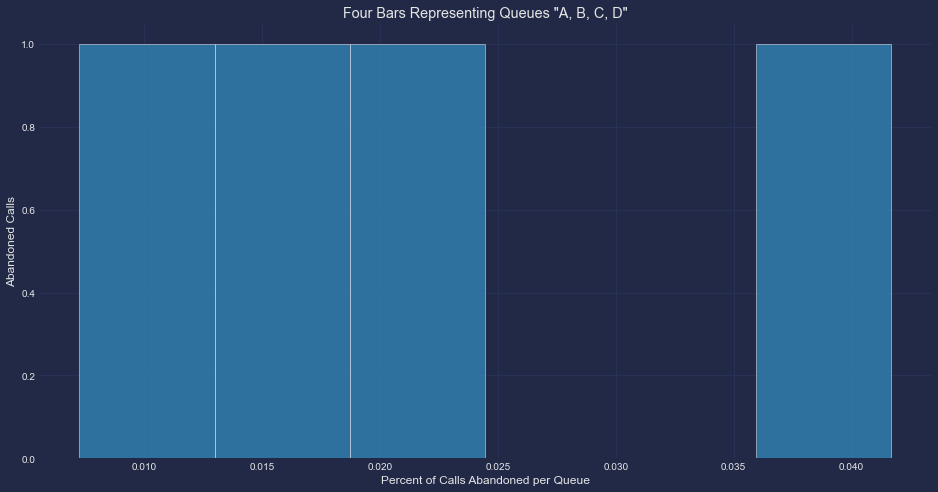

In [24]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    

plt.figure(figsize = (16,8))
sns.histplot(x = abandonment_rates, bins = 6)
plt.title('Four Bars Representing Queues "A, B, C, D"')
plt.ylabel('Abandoned Calls')
plt.xlabel('Percent of Calls Abandoned per Queue')
#average abandonment rate is A 1%, B 2%, C 2%, D 4%
#I chose this histplot because it makes seeing and comparing metrics easy

In [8]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df_north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df_north[df_north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df_north[df_north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

print(north_plt)



   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333


TypeError: float() argument must be a string or a number, not 'dict'

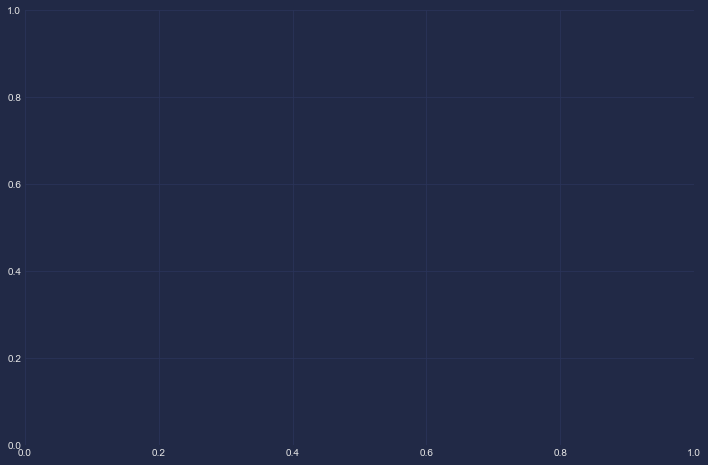

In [25]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()





# Cyberpunk Multiple Line Chart

import mplcyberpunk
plt.style.use('cyberpunk')

plt.plot(complaints, marker = 'o')
plt.plot(sales_support, marker = 'o')
plt.plot(product_support, marker = 'o')



plt.show()


### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
